# Classification of patients with diabetes

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
data = pd.read_csv("../data/diabetes.csv")
data.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [28]:
# Separation of explanatory variables from the target variable

x = data.drop("diabetes", axis=1)
y = data["diabetes"]

In [29]:
# Data split: 5% for testing, 23% for validation, 72% for training

x, x_test, y, y_test = train_test_split(
    x, y, test_size=0.05, random_state=12, stratify=y
)
x_train, x_valid, y_train, y_valid = train_test_split(
    x, y, test_size=0.25, random_state=12, stratify=y
)


## Decision Tree

In [30]:
tree = DecisionTreeClassifier(random_state=12, max_depth=5)
tree.fit(x_train, y_train)

print(tree.score(x_test, y_test))
print(tree.score(x_valid, y_valid))

0.55
0.648936170212766


[[45 18]
 [15 16]]


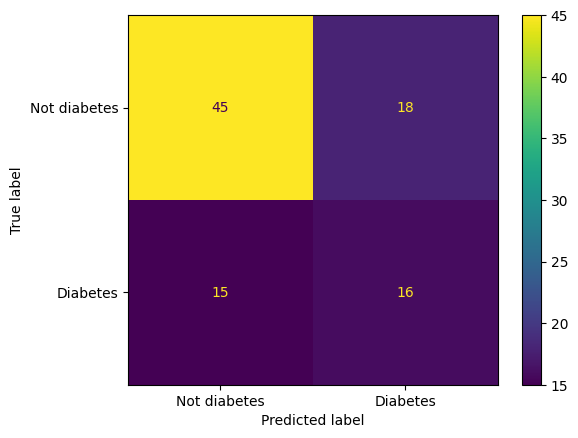

In [31]:
y_prev = tree.predict(x_valid)
cm = confusion_matrix(y_valid, y_prev)
print(cm)

visualization = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not diabetes", "Diabetes"])
visualization.plot()

## Random Forest

0.65
0.648936170212766
[[52 11]
 [22  9]]


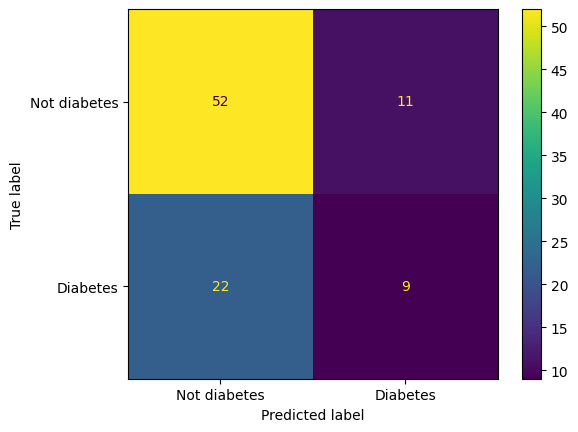

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ramdom_forest = RandomForestClassifier(random_state=12, max_depth=5, n_estimators=100)
ramdom_forest.fit(x_train, y_train)
print(ramdom_forest.score(x_test, y_test))
print(ramdom_forest.score(x_valid, y_valid))

y_prev = ramdom_forest.predict(x_valid)
cm = confusion_matrix(y_valid, y_prev)
print(cm)
visualization = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not diabetes", "Diabetes"])
visualization.plot()